In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<font color='red'> Reading the csv file </font>

In [159]:
path = '/content/drive/MyDrive/AAIC/ASSIGN_15/'

In [160]:
import pandas as pd
data=pd.read_csv(path+'ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [161]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [162]:
from scipy.sparse import csr_matrix
adjacency_matrix =  csr_matrix((data['rating'],(data['user_id'],data['item_id'])))# write your code of adjacency matrix here

In [163]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [164]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [165]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [166]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=1)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)


(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [167]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return ratings.mean()

In [168]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [169]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [170]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 

    

    return [0]*dim

In [171]:
dim= adjacency_matrix.shape[0]# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [172]:
dim=adjacency_matrix.shape[1] # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [173]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [174]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    sam = alpha*b_i[user_id] - (rating - mu -b_i[user_id] -c_j[item_id] -np.dot(U[user_id,:],V[:,item_id]))
    sam = 2*sam
    
    
    return sam


<font color='cyan'>Grader function -4 </font>

In [175]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence

alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [176]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    sam = alpha*c_j[item_id] - (rating - mu -b_i[user_id] -c_j[item_id] -np.dot(U[user_id,:],V[:,item_id]))
    sam = 2*sam
    
    
    return sam


<font color='cyan'>Grader function - 5 </font>

In [177]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [178]:
from sklearn.metrics import mean_squared_error

epochs = 50
n_com = 900
alpha = 0.1
r = 0.1
lr = 0.00001

U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=n_com ,n_iter=30)
print(U1.shape)
print(V1.shape)

print(adjacency_matrix.shape)
pred_rating = np.zeros(adjacency_matrix.shape)
print(pred_rating.shape)

MSE = []

for epoch in range(epochs):
    for i in range(len(b_i)):
        for j in range(len(c_j)):
            b_i[i] = b_i[i] - lr * derivative_db(i,j,adjacency_matrix[i,j],U1,V1,mu,alpha)
            c_j[j] = b_i[i] - lr * derivative_dc(i,j,adjacency_matrix[i,j],U1,V1,mu,r)
            pred_rating[i,j] = mu+b_i[i]+c_j[j]+np.dot(U1[i,:],V1[:,j])

    mse = mean_squared_error(adjacency_matrix.toarray(), pred_rating)
    print(str(epoch)+':'+str(mse))
    
    MSE.append(mse)
    
print(MSE)

(943, 900)
(900, 1681)
(943, 1681)
(943, 1681)
0:11.081639815739358
1:9.775472602438578
2:8.63708262171535
3:7.644682236313814
4:6.779327453915718
5:6.024550205990485
6:5.366033566234692
7:4.79132965228029
8:4.289614595754088
9:3.851475704775306
10:3.468726584693329
11:3.1342465401035384
12:2.841841065058673
13:2.586120648574663
14:2.3623954874001303
15:2.1665840148599376
16:1.9951334297188275
17:1.8449506479320774
18:1.7133423076240857
19:1.5979626378028902
20:1.4967681577738337
21:1.4079783100804288
22:1.33004124778561
23:1.2616040993656636
24:1.2014871234660027
25:1.1486612430373466
26:1.102228515473803
27:1.061405153649037
28:1.0255067633551218
29:0.9939355065997977
30:0.966168938387937
31:0.9417502977628163
32:0.9202800626730204
33:0.9014086032351388
34:0.8848297896790509
35:0.87027543012412
36:0.8575104297166949
37:0.8463285768881519
38:0.8365488748515882
39:0.8280123471901668
40:0.8205792557146482
41:0.8141266768673107
42:0.8085463899853603
43:0.8037430368489372
44:0.79963251724

In [179]:
print(pred_rating) #we can observe that more users have given high rating for the first movie. 

[[0.84586645 0.79213059 0.90521759 ... 0.81976166 0.82091536 0.81456016]
 [0.17519634 0.07535668 0.1021043  ... 0.11674885 0.11294922 0.11073341]
 [0.43795425 0.42786313 0.44363028 ... 0.44003585 0.42612667 0.44050006]
 ...
 [0.12487719 0.1533799  0.15844136 ... 0.16803064 0.15081865 0.1564356 ]
 [0.57371379 0.55645492 0.5743767  ... 0.5886821  0.59116511 0.59296929]
 [0.5518566  0.6904083  0.52637912 ... 0.5692556  0.56415896 0.57291178]]


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

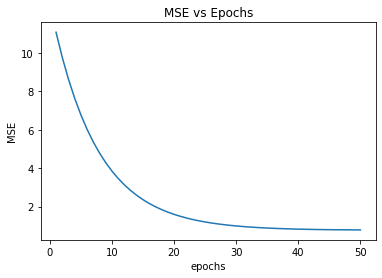

In [180]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(1,epochs+1)],MSE)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('MSE vs Epochs')
plt.show()

<font color='red'> Task 2</font>

In [181]:
usr_data=pd.read_csv(path+'user_info.csv.txt')
usr_data.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [182]:
X = np.concatenate((U1,usr_data['age'].to_numpy(dtype=int).reshape(-1,1)),axis = 1)
y = usr_data['is_male'].to_numpy()
print(X.shape,y.shape)

(943, 901) (943,)


In [183]:
print(X)

[[ 6.62257023e-02  7.88851791e-03 -1.25312581e-02 ...  8.56543082e-03
   1.16203130e-02  2.40000000e+01]
 [ 1.36443174e-02 -4.88950212e-02  5.65537222e-02 ... -4.94073518e-02
  -9.17120326e-03  5.30000000e+01]
 [ 5.43826120e-03 -2.51277980e-02  2.00277398e-02 ...  5.30614847e-02
   4.81935436e-02  2.30000000e+01]
 ...
 [ 7.38924381e-03 -2.59737536e-02  6.34329873e-03 ...  2.85958049e-02
   1.43866607e-01  2.00000000e+01]
 [ 2.49992387e-02  4.47791436e-03  2.60564574e-02 ... -1.52048244e-03
   1.35618371e-02  4.80000000e+01]
 [ 4.33734106e-02 -2.81487169e-03 -6.07778951e-02 ... -4.09969180e-03
   3.81988884e-03  2.20000000e+01]]


In [184]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
print(clf.score(X, y))

[1 1]
[[0.23973849 0.76026151]
 [0.41763493 0.58236507]]
0.7104984093319194


- clf.score returns the mean accuracy on the given test data and labels 
- As in the above code cell we have given the training data to the classifier(Logistic Regression) it is giving the accuracy of 71%. 
- So we can conclude that the user_representation makes prediction of is_male upto 71% and the accuracy might increase if we get a better representation of user by increasing the no of components in truncated_svd. 

* Checking whehter only user vectors make differnce in is_male classification. 

In [185]:
X = ((U1))
y = usr_data['is_male'].to_numpy()
print(X.shape,y.shape)

(943, 900) (943,)


In [186]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
print(clf.score(X, y))

[1 1]
[[0.23641657 0.76358343]
 [0.42568659 0.57431341]]
0.7104984093319194


- We can observe that there is not much variation observed in the final accuracy of clf.